In [ ]:
%pip install torch

In [ ]:
%pip install torchvision

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

import os
from torchvision.datasets import MNIST
from torchvision import transforms as tfs
from torch.utils.data import DataLoader

In [ ]:


data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])

# install for train and test
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=256, shuffle=True)
valid_dataloader =  DataLoader(val_dataset, batch_size=256, shuffle=True) 

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool1 = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 3) 
        self.pool2 = nn.MaxPool2d(2, 2) 
        self.fc1 = nn.Linear(5*5*16, 120) 
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10) 

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x))) 
        x = self.pool2(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN().to(device)
batch = []
batch = next(iter(train_dataloader))
model.forward(torch.FloatTensor(batch[0]))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_dataloader, "valid": valid_dataloader}

In [13]:
max_epochs = 10
accuracy = {"train": [], "valid": []}
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        for x_batch, y_batch in dataloader:
            if k == "train":
                 model.train()
                 optimizer.zero_grad()
                 outp = model(x_batch)
            else:
                 model.eval()
                 with torch.no_grad():
                  outp = torch.softmax(model(x_batch), dim=1)
            preds = outp.argmax(-1)
            correct =  (preds == y_batch).sum() 
            all = len(preds)
            epoch_correct += correct.item()
            epoch_all += all
            if k == "train":
                loss = criterion(outp, y_batch)
                loss.backward()
                optimizer.step()
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.83745
Loader: valid. Accuracy: 0.9532
Epoch: 2
Loader: train. Accuracy: 0.9610333333333333
Loader: valid. Accuracy: 0.9712
Epoch: 3
Loader: train. Accuracy: 0.9727166666666667
Loader: valid. Accuracy: 0.9756
Epoch: 4
Loader: train. Accuracy: 0.9784
Loader: valid. Accuracy: 0.9823
Epoch: 5
Loader: train. Accuracy: 0.9825833333333334
Loader: valid. Accuracy: 0.9826
Epoch: 6
Loader: train. Accuracy: 0.9846833333333334
Loader: valid. Accuracy: 0.9855
Epoch: 7
Loader: train. Accuracy: 0.9868333333333333
Loader: valid. Accuracy: 0.9869
Epoch: 8
Loader: train. Accuracy: 0.9881833333333333
Loader: valid. Accuracy: 0.9868
Epoch: 9
Loader: train. Accuracy: 0.98965
Loader: valid. Accuracy: 0.9858
Epoch: 10
Loader: train. Accuracy: 0.9907833333333333
Loader: valid. Accuracy: 0.9869


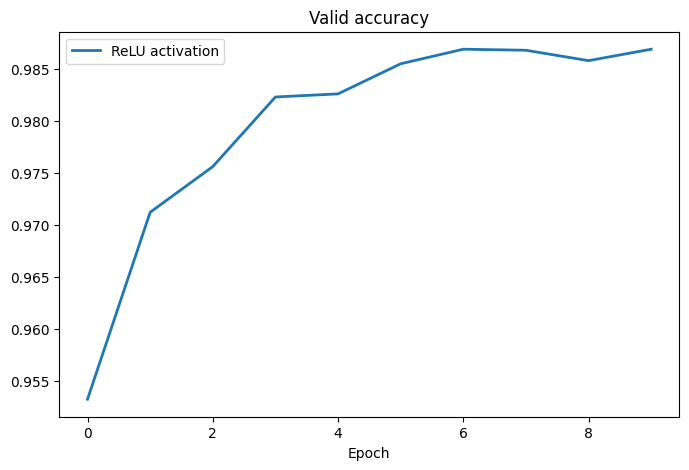

In [15]:
plt.figure(figsize=(8, 5))
plt.title("Valid accuracy")
plt.plot(range(max_epochs), accuracy['valid'], label="ReLU activation", linewidth=2)
plt.legend()
plt.xlabel("Epoch")
plt.show()